In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib as mpl
import sqlite3
mpl.rcParams['figure.dpi'] = 300

In [8]:
columns_subset = [
 'sg_uf_residencia',
 'nu_idade',
 'tp_sexo',
 'tp_estado_civil',
 'tp_cor_raca',
 'tp_ano_concluiu',
 'tp_escola',
 'nu_nota_cn',
 'nu_nota_ch',
 'nu_nota_lc',
 'nu_nota_mt',
 'tp_lingua',
 'nu_nota_redacao',
 'q001',
 'q002',
 'q003',
 'q004',
 'q005',
 'q006',
 'q007',
 'q008',
 'q009',
 'q010',
 'q011',
 'q012',
 'q013',
 'q014',
 'q015',
 'q016',
 'q017',
 'q018',
 'q019',
 'q020',
 'q021',
 'q022',
 'q023',
 'q024',
 'q025',
 'q026',
 'q027'
]

columns_min_max = {
 'nu_idade': [10, 100],
 'q001': [0, 6],
 'q002': [0, 6],
 'q005': [0, 19],
 'q006': [0, 16],
 'q007': [0, 3],
 'q008': [0, 4],
 'q009': [0, 4],
 'q010': [0, 4],
 'q011': [0, 4],
 'q012': [0, 4],
 'q013': [0, 4],
 'q014': [0, 4],
 'q015': [0, 4],
 'q016': [0, 4],
 'q017': [0, 4],
 'q019': [0, 4],
 'q022': [0, 4],
 'q024': [0, 4]
}

dummies = {
    'sg_uf_residencia': range(-1,27),
    'tp_estado_civil': range(-1,4),
    'tp_cor_raca': range(-1,6),
    'tp_ano_concluiu': range(-1,12),
    'tp_escola': list(range(1, 5)) + [-1],
    'q003': range(-1, 5),
    'q004': range(-1, 5),
    'q026': range(-1, 4),
    'q027': range(-1, 5)
}

In [2]:
conn = sqlite3.connect('microdados_enem2017/database.db')

In [10]:
chunks = pd.read_sql_query('''SELECT sg_uf_residencia,nu_idade,tp_sexo,tp_estado_civil,tp_cor_raca,tp_ano_concluiu,tp_escola,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,tp_lingua,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025,q026,q027 
                              FROM enem''',
                           conn, chunksize=1000)

In [4]:
def set_dummies(df, dummies):
    for column,cats in dummies.items(): 
        df[column] = df[column].astype('category', categories=list(cats))
    return pd.get_dummies(df, columns=list(dummies.keys()))

In [5]:
def normalize_continous_vars(df, columns_min_max):
    for column, min_max in columns_min_max.items():
        mn,mx = min_max
        df[column] = df[column].apply(lambda x: (x - mn) / (mx - mn) if x >= mn and x <= mx else -1)
    return df

In [12]:
output_dir = "./microdados_enem2017/normalized_enem2017/"
rows_count = 0

for i, c in enumerate(chunks):
    c.columns = [x.lower() for x in c.columns]
    c = c.apply(pd.to_numeric)
    part = "part{:04d}".format(i)
    rows = len(c.index)
    rows_count += rows
    set_dummies(normalize_continous_vars(c, columns_min_max), dummies).to_csv(output_dir + part + ".csv", index=False, float_format="%.3f")
    print("{} written, {} entries added.".format(part, rows))

print("---")
print("Finished. Total rows count: {}".format(rows_count))


/home/tiago/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


part0000 written, 1000 entries added.
part0001 written, 1000 entries added.
part0002 written, 1000 entries added.
part0003 written, 1000 entries added.
part0004 written, 1000 entries added.
part0005 written, 1000 entries added.
part0006 written, 1000 entries added.
part0007 written, 1000 entries added.
part0008 written, 1000 entries added.
part0009 written, 1000 entries added.
part0010 written, 1000 entries added.
part0011 written, 1000 entries added.
part0012 written, 1000 entries added.
part0013 written, 1000 entries added.
part0014 written, 1000 entries added.
part0015 written, 1000 entries added.
part0016 written, 1000 entries added.
part0017 written, 1000 entries added.
part0018 written, 1000 entries added.
part0019 written, 1000 entries added.
part0020 written, 1000 entries added.
part0021 written, 1000 entries added.
part0022 written, 1000 entries added.
part0023 written, 1000 entries added.
part0024 written, 1000 entries added.
part0025 written, 1000 entries added.
part0026 wri

part0216 written, 1000 entries added.
part0217 written, 1000 entries added.
part0218 written, 1000 entries added.
part0219 written, 1000 entries added.
part0220 written, 1000 entries added.
part0221 written, 1000 entries added.
part0222 written, 1000 entries added.
part0223 written, 1000 entries added.
part0224 written, 1000 entries added.
part0225 written, 1000 entries added.
part0226 written, 1000 entries added.
part0227 written, 1000 entries added.
part0228 written, 1000 entries added.
part0229 written, 1000 entries added.
part0230 written, 1000 entries added.
part0231 written, 1000 entries added.
part0232 written, 1000 entries added.
part0233 written, 1000 entries added.
part0234 written, 1000 entries added.
part0235 written, 1000 entries added.
part0236 written, 1000 entries added.
part0237 written, 1000 entries added.
part0238 written, 1000 entries added.
part0239 written, 1000 entries added.
part0240 written, 1000 entries added.
part0241 written, 1000 entries added.
part0242 wri

part0432 written, 1000 entries added.
part0433 written, 1000 entries added.
part0434 written, 1000 entries added.
part0435 written, 1000 entries added.
part0436 written, 1000 entries added.
part0437 written, 1000 entries added.
part0438 written, 1000 entries added.
part0439 written, 1000 entries added.
part0440 written, 1000 entries added.
part0441 written, 1000 entries added.
part0442 written, 1000 entries added.
part0443 written, 1000 entries added.
part0444 written, 1000 entries added.
part0445 written, 1000 entries added.
part0446 written, 1000 entries added.
part0447 written, 1000 entries added.
part0448 written, 1000 entries added.
part0449 written, 1000 entries added.
part0450 written, 1000 entries added.
part0451 written, 1000 entries added.
part0452 written, 1000 entries added.
part0453 written, 1000 entries added.
part0454 written, 1000 entries added.
part0455 written, 1000 entries added.
part0456 written, 1000 entries added.
part0457 written, 1000 entries added.
part0458 wri

part0648 written, 1000 entries added.
part0649 written, 1000 entries added.
part0650 written, 1000 entries added.
part0651 written, 1000 entries added.
part0652 written, 1000 entries added.
part0653 written, 1000 entries added.
part0654 written, 1000 entries added.
part0655 written, 1000 entries added.
part0656 written, 1000 entries added.
part0657 written, 1000 entries added.
part0658 written, 1000 entries added.
part0659 written, 1000 entries added.
part0660 written, 1000 entries added.
part0661 written, 1000 entries added.
part0662 written, 1000 entries added.
part0663 written, 1000 entries added.
part0664 written, 1000 entries added.
part0665 written, 1000 entries added.
part0666 written, 1000 entries added.
part0667 written, 1000 entries added.
part0668 written, 1000 entries added.
part0669 written, 1000 entries added.
part0670 written, 1000 entries added.
part0671 written, 1000 entries added.
part0672 written, 1000 entries added.
part0673 written, 1000 entries added.
part0674 wri

part0864 written, 1000 entries added.
part0865 written, 1000 entries added.
part0866 written, 1000 entries added.
part0867 written, 1000 entries added.
part0868 written, 1000 entries added.
part0869 written, 1000 entries added.
part0870 written, 1000 entries added.
part0871 written, 1000 entries added.
part0872 written, 1000 entries added.
part0873 written, 1000 entries added.
part0874 written, 1000 entries added.
part0875 written, 1000 entries added.
part0876 written, 1000 entries added.
part0877 written, 1000 entries added.
part0878 written, 1000 entries added.
part0879 written, 1000 entries added.
part0880 written, 1000 entries added.
part0881 written, 1000 entries added.
part0882 written, 1000 entries added.
part0883 written, 1000 entries added.
part0884 written, 1000 entries added.
part0885 written, 1000 entries added.
part0886 written, 1000 entries added.
part0887 written, 1000 entries added.
part0888 written, 1000 entries added.
part0889 written, 1000 entries added.
part0890 wri

part1080 written, 1000 entries added.
part1081 written, 1000 entries added.
part1082 written, 1000 entries added.
part1083 written, 1000 entries added.
part1084 written, 1000 entries added.
part1085 written, 1000 entries added.
part1086 written, 1000 entries added.
part1087 written, 1000 entries added.
part1088 written, 1000 entries added.
part1089 written, 1000 entries added.
part1090 written, 1000 entries added.
part1091 written, 1000 entries added.
part1092 written, 1000 entries added.
part1093 written, 1000 entries added.
part1094 written, 1000 entries added.
part1095 written, 1000 entries added.
part1096 written, 1000 entries added.
part1097 written, 1000 entries added.
part1098 written, 1000 entries added.
part1099 written, 1000 entries added.
part1100 written, 1000 entries added.
part1101 written, 1000 entries added.
part1102 written, 1000 entries added.
part1103 written, 1000 entries added.
part1104 written, 1000 entries added.
part1105 written, 1000 entries added.
part1106 wri

part1296 written, 1000 entries added.
part1297 written, 1000 entries added.
part1298 written, 1000 entries added.
part1299 written, 1000 entries added.
part1300 written, 1000 entries added.
part1301 written, 1000 entries added.
part1302 written, 1000 entries added.
part1303 written, 1000 entries added.
part1304 written, 1000 entries added.
part1305 written, 1000 entries added.
part1306 written, 1000 entries added.
part1307 written, 1000 entries added.
part1308 written, 1000 entries added.
part1309 written, 1000 entries added.
part1310 written, 1000 entries added.
part1311 written, 1000 entries added.
part1312 written, 1000 entries added.
part1313 written, 1000 entries added.
part1314 written, 1000 entries added.
part1315 written, 1000 entries added.
part1316 written, 1000 entries added.
part1317 written, 1000 entries added.
part1318 written, 1000 entries added.
part1319 written, 1000 entries added.
part1320 written, 1000 entries added.
part1321 written, 1000 entries added.
part1322 wri

part1512 written, 1000 entries added.
part1513 written, 1000 entries added.
part1514 written, 1000 entries added.
part1515 written, 1000 entries added.
part1516 written, 1000 entries added.
part1517 written, 1000 entries added.
part1518 written, 1000 entries added.
part1519 written, 1000 entries added.
part1520 written, 1000 entries added.
part1521 written, 1000 entries added.
part1522 written, 1000 entries added.
part1523 written, 1000 entries added.
part1524 written, 1000 entries added.
part1525 written, 1000 entries added.
part1526 written, 1000 entries added.
part1527 written, 1000 entries added.
part1528 written, 1000 entries added.
part1529 written, 1000 entries added.
part1530 written, 1000 entries added.
part1531 written, 1000 entries added.
part1532 written, 1000 entries added.
part1533 written, 1000 entries added.
part1534 written, 1000 entries added.
part1535 written, 1000 entries added.
part1536 written, 1000 entries added.
part1537 written, 1000 entries added.
part1538 wri

part1728 written, 1000 entries added.
part1729 written, 1000 entries added.
part1730 written, 1000 entries added.
part1731 written, 1000 entries added.
part1732 written, 1000 entries added.
part1733 written, 1000 entries added.
part1734 written, 1000 entries added.
part1735 written, 1000 entries added.
part1736 written, 1000 entries added.
part1737 written, 1000 entries added.
part1738 written, 1000 entries added.
part1739 written, 1000 entries added.
part1740 written, 1000 entries added.
part1741 written, 1000 entries added.
part1742 written, 1000 entries added.
part1743 written, 1000 entries added.
part1744 written, 1000 entries added.
part1745 written, 1000 entries added.
part1746 written, 1000 entries added.
part1747 written, 1000 entries added.
part1748 written, 1000 entries added.
part1749 written, 1000 entries added.
part1750 written, 1000 entries added.
part1751 written, 1000 entries added.
part1752 written, 1000 entries added.
part1753 written, 1000 entries added.
part1754 wri

part1944 written, 1000 entries added.
part1945 written, 1000 entries added.
part1946 written, 1000 entries added.
part1947 written, 1000 entries added.
part1948 written, 1000 entries added.
part1949 written, 1000 entries added.
part1950 written, 1000 entries added.
part1951 written, 1000 entries added.
part1952 written, 1000 entries added.
part1953 written, 1000 entries added.
part1954 written, 1000 entries added.
part1955 written, 1000 entries added.
part1956 written, 1000 entries added.
part1957 written, 1000 entries added.
part1958 written, 1000 entries added.
part1959 written, 1000 entries added.
part1960 written, 1000 entries added.
part1961 written, 1000 entries added.
part1962 written, 1000 entries added.
part1963 written, 1000 entries added.
part1964 written, 1000 entries added.
part1965 written, 1000 entries added.
part1966 written, 1000 entries added.
part1967 written, 1000 entries added.
part1968 written, 1000 entries added.
part1969 written, 1000 entries added.
part1970 wri

part2160 written, 1000 entries added.
part2161 written, 1000 entries added.
part2162 written, 1000 entries added.
part2163 written, 1000 entries added.
part2164 written, 1000 entries added.
part2165 written, 1000 entries added.
part2166 written, 1000 entries added.
part2167 written, 1000 entries added.
part2168 written, 1000 entries added.
part2169 written, 1000 entries added.
part2170 written, 1000 entries added.
part2171 written, 1000 entries added.
part2172 written, 1000 entries added.
part2173 written, 1000 entries added.
part2174 written, 1000 entries added.
part2175 written, 1000 entries added.
part2176 written, 1000 entries added.
part2177 written, 1000 entries added.
part2178 written, 1000 entries added.
part2179 written, 1000 entries added.
part2180 written, 1000 entries added.
part2181 written, 1000 entries added.
part2182 written, 1000 entries added.
part2183 written, 1000 entries added.
part2184 written, 1000 entries added.
part2185 written, 1000 entries added.
part2186 wri

part2376 written, 1000 entries added.
part2377 written, 1000 entries added.
part2378 written, 1000 entries added.
part2379 written, 1000 entries added.
part2380 written, 1000 entries added.
part2381 written, 1000 entries added.
part2382 written, 1000 entries added.
part2383 written, 1000 entries added.
part2384 written, 1000 entries added.
part2385 written, 1000 entries added.
part2386 written, 1000 entries added.
part2387 written, 1000 entries added.
part2388 written, 1000 entries added.
part2389 written, 1000 entries added.
part2390 written, 1000 entries added.
part2391 written, 1000 entries added.
part2392 written, 1000 entries added.
part2393 written, 1000 entries added.
part2394 written, 1000 entries added.
part2395 written, 1000 entries added.
part2396 written, 1000 entries added.
part2397 written, 1000 entries added.
part2398 written, 1000 entries added.
part2399 written, 1000 entries added.
part2400 written, 1000 entries added.
part2401 written, 1000 entries added.
part2402 wri

part2592 written, 1000 entries added.
part2593 written, 1000 entries added.
part2594 written, 1000 entries added.
part2595 written, 1000 entries added.
part2596 written, 1000 entries added.
part2597 written, 1000 entries added.
part2598 written, 1000 entries added.
part2599 written, 1000 entries added.
part2600 written, 1000 entries added.
part2601 written, 1000 entries added.
part2602 written, 1000 entries added.
part2603 written, 1000 entries added.
part2604 written, 1000 entries added.
part2605 written, 1000 entries added.
part2606 written, 1000 entries added.
part2607 written, 1000 entries added.
part2608 written, 1000 entries added.
part2609 written, 1000 entries added.
part2610 written, 1000 entries added.
part2611 written, 1000 entries added.
part2612 written, 1000 entries added.
part2613 written, 1000 entries added.
part2614 written, 1000 entries added.
part2615 written, 1000 entries added.
part2616 written, 1000 entries added.
part2617 written, 1000 entries added.
part2618 wri

part2808 written, 1000 entries added.
part2809 written, 1000 entries added.
part2810 written, 1000 entries added.
part2811 written, 1000 entries added.
part2812 written, 1000 entries added.
part2813 written, 1000 entries added.
part2814 written, 1000 entries added.
part2815 written, 1000 entries added.
part2816 written, 1000 entries added.
part2817 written, 1000 entries added.
part2818 written, 1000 entries added.
part2819 written, 1000 entries added.
part2820 written, 1000 entries added.
part2821 written, 1000 entries added.
part2822 written, 1000 entries added.
part2823 written, 1000 entries added.
part2824 written, 1000 entries added.
part2825 written, 1000 entries added.
part2826 written, 1000 entries added.
part2827 written, 1000 entries added.
part2828 written, 1000 entries added.
part2829 written, 1000 entries added.
part2830 written, 1000 entries added.
part2831 written, 1000 entries added.
part2832 written, 1000 entries added.
part2833 written, 1000 entries added.
part2834 wri

part3024 written, 1000 entries added.
part3025 written, 1000 entries added.
part3026 written, 1000 entries added.
part3027 written, 1000 entries added.
part3028 written, 1000 entries added.
part3029 written, 1000 entries added.
part3030 written, 1000 entries added.
part3031 written, 1000 entries added.
part3032 written, 1000 entries added.
part3033 written, 1000 entries added.
part3034 written, 1000 entries added.
part3035 written, 1000 entries added.
part3036 written, 1000 entries added.
part3037 written, 1000 entries added.
part3038 written, 1000 entries added.
part3039 written, 1000 entries added.
part3040 written, 1000 entries added.
part3041 written, 1000 entries added.
part3042 written, 1000 entries added.
part3043 written, 1000 entries added.
part3044 written, 1000 entries added.
part3045 written, 1000 entries added.
part3046 written, 1000 entries added.
part3047 written, 1000 entries added.
part3048 written, 1000 entries added.
part3049 written, 1000 entries added.
part3050 wri

part3240 written, 1000 entries added.
part3241 written, 1000 entries added.
part3242 written, 1000 entries added.
part3243 written, 1000 entries added.
part3244 written, 1000 entries added.
part3245 written, 1000 entries added.
part3246 written, 1000 entries added.
part3247 written, 1000 entries added.
part3248 written, 1000 entries added.
part3249 written, 1000 entries added.
part3250 written, 1000 entries added.
part3251 written, 1000 entries added.
part3252 written, 1000 entries added.
part3253 written, 1000 entries added.
part3254 written, 1000 entries added.
part3255 written, 1000 entries added.
part3256 written, 1000 entries added.
part3257 written, 1000 entries added.
part3258 written, 1000 entries added.
part3259 written, 1000 entries added.
part3260 written, 1000 entries added.
part3261 written, 1000 entries added.
part3262 written, 1000 entries added.
part3263 written, 1000 entries added.
part3264 written, 1000 entries added.
part3265 written, 1000 entries added.
part3266 wri

part3456 written, 1000 entries added.
part3457 written, 1000 entries added.
part3458 written, 1000 entries added.
part3459 written, 1000 entries added.
part3460 written, 1000 entries added.
part3461 written, 1000 entries added.
part3462 written, 1000 entries added.
part3463 written, 1000 entries added.
part3464 written, 1000 entries added.
part3465 written, 1000 entries added.
part3466 written, 1000 entries added.
part3467 written, 1000 entries added.
part3468 written, 1000 entries added.
part3469 written, 1000 entries added.
part3470 written, 1000 entries added.
part3471 written, 1000 entries added.
part3472 written, 1000 entries added.
part3473 written, 1000 entries added.
part3474 written, 1000 entries added.
part3475 written, 1000 entries added.
part3476 written, 1000 entries added.
part3477 written, 1000 entries added.
part3478 written, 1000 entries added.
part3479 written, 1000 entries added.
part3480 written, 1000 entries added.
part3481 written, 1000 entries added.
part3482 wri

part3672 written, 1000 entries added.
part3673 written, 1000 entries added.
part3674 written, 1000 entries added.
part3675 written, 1000 entries added.
part3676 written, 1000 entries added.
part3677 written, 1000 entries added.
part3678 written, 1000 entries added.
part3679 written, 1000 entries added.
part3680 written, 1000 entries added.
part3681 written, 1000 entries added.
part3682 written, 1000 entries added.
part3683 written, 1000 entries added.
part3684 written, 1000 entries added.
part3685 written, 1000 entries added.
part3686 written, 1000 entries added.
part3687 written, 1000 entries added.
part3688 written, 1000 entries added.
part3689 written, 1000 entries added.
part3690 written, 1000 entries added.
part3691 written, 1000 entries added.
part3692 written, 1000 entries added.
part3693 written, 1000 entries added.
part3694 written, 1000 entries added.
part3695 written, 1000 entries added.
part3696 written, 1000 entries added.
part3697 written, 1000 entries added.
part3698 wri

part3888 written, 1000 entries added.
part3889 written, 1000 entries added.
part3890 written, 1000 entries added.
part3891 written, 1000 entries added.
part3892 written, 1000 entries added.
part3893 written, 1000 entries added.
part3894 written, 1000 entries added.
part3895 written, 1000 entries added.
part3896 written, 1000 entries added.
part3897 written, 1000 entries added.
part3898 written, 1000 entries added.
part3899 written, 1000 entries added.
part3900 written, 1000 entries added.
part3901 written, 1000 entries added.
part3902 written, 1000 entries added.
part3903 written, 1000 entries added.
part3904 written, 1000 entries added.
part3905 written, 1000 entries added.
part3906 written, 1000 entries added.
part3907 written, 1000 entries added.
part3908 written, 1000 entries added.
part3909 written, 1000 entries added.
part3910 written, 1000 entries added.
part3911 written, 1000 entries added.
part3912 written, 1000 entries added.
part3913 written, 1000 entries added.
part3914 wri

part4104 written, 1000 entries added.
part4105 written, 1000 entries added.
part4106 written, 1000 entries added.
part4107 written, 1000 entries added.
part4108 written, 1000 entries added.
part4109 written, 1000 entries added.
part4110 written, 1000 entries added.
part4111 written, 1000 entries added.
part4112 written, 1000 entries added.
part4113 written, 1000 entries added.
part4114 written, 1000 entries added.
part4115 written, 1000 entries added.
part4116 written, 1000 entries added.
part4117 written, 1000 entries added.
part4118 written, 1000 entries added.
part4119 written, 1000 entries added.
part4120 written, 1000 entries added.
part4121 written, 1000 entries added.
part4122 written, 1000 entries added.
part4123 written, 1000 entries added.
part4124 written, 1000 entries added.
part4125 written, 1000 entries added.
part4126 written, 1000 entries added.
part4127 written, 1000 entries added.
part4128 written, 1000 entries added.
part4129 written, 1000 entries added.
part4130 wri

part4320 written, 1000 entries added.
part4321 written, 1000 entries added.
part4322 written, 1000 entries added.
part4323 written, 1000 entries added.
part4324 written, 1000 entries added.
part4325 written, 1000 entries added.
part4326 written, 1000 entries added.
part4327 written, 1000 entries added.
part4328 written, 1000 entries added.
part4329 written, 1000 entries added.
part4330 written, 1000 entries added.
part4331 written, 1000 entries added.
part4332 written, 1000 entries added.
part4333 written, 1000 entries added.
part4334 written, 1000 entries added.
part4335 written, 1000 entries added.
part4336 written, 1000 entries added.
part4337 written, 1000 entries added.
part4338 written, 1000 entries added.
part4339 written, 1000 entries added.
part4340 written, 1000 entries added.
part4341 written, 1000 entries added.
part4342 written, 1000 entries added.
part4343 written, 1000 entries added.
part4344 written, 1000 entries added.
part4345 written, 1000 entries added.
part4346 wri

In [13]:
normalized_columns = 'nu_idade,tp_sexo,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,tp_lingua,nu_nota_redacao,q001,q002,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025,sg_uf_residencia_-1,sg_uf_residencia_0,sg_uf_residencia_1,sg_uf_residencia_2,sg_uf_residencia_3,sg_uf_residencia_4,sg_uf_residencia_5,sg_uf_residencia_6,sg_uf_residencia_7,sg_uf_residencia_8,sg_uf_residencia_9,sg_uf_residencia_10,sg_uf_residencia_11,sg_uf_residencia_12,sg_uf_residencia_13,sg_uf_residencia_14,sg_uf_residencia_15,sg_uf_residencia_16,sg_uf_residencia_17,sg_uf_residencia_18,sg_uf_residencia_19,sg_uf_residencia_20,sg_uf_residencia_21,sg_uf_residencia_22,sg_uf_residencia_23,sg_uf_residencia_24,sg_uf_residencia_25,sg_uf_residencia_26,tp_estado_civil_-1,tp_estado_civil_0,tp_estado_civil_1,tp_estado_civil_2,tp_estado_civil_3,tp_cor_raca_-1,tp_cor_raca_0,tp_cor_raca_1,tp_cor_raca_2,tp_cor_raca_3,tp_cor_raca_4,tp_cor_raca_5,tp_ano_concluiu_-1,tp_ano_concluiu_0,tp_ano_concluiu_1,tp_ano_concluiu_2,tp_ano_concluiu_3,tp_ano_concluiu_4,tp_ano_concluiu_5,tp_ano_concluiu_6,tp_ano_concluiu_7,tp_ano_concluiu_8,tp_ano_concluiu_9,tp_ano_concluiu_10,tp_ano_concluiu_11,tp_escola_1,tp_escola_2,tp_escola_3,tp_escola_4,tp_escola_-1,q003_-1,q003_0,q003_1,q003_2,q003_3,q003_4,q004_-1,q004_0,q004_1,q004_2,q004_3,q004_4,q026_-1,q026_0,q026_1,q026_2,q026_3,q027_-1,q027_0,q027_1,q027_2,q027_3,q027_4'.split(',')
normalized_columns

['nu_idade',
 'tp_sexo',
 'nu_nota_cn',
 'nu_nota_ch',
 'nu_nota_lc',
 'nu_nota_mt',
 'tp_lingua',
 'nu_nota_redacao',
 'q001',
 'q002',
 'q005',
 'q006',
 'q007',
 'q008',
 'q009',
 'q010',
 'q011',
 'q012',
 'q013',
 'q014',
 'q015',
 'q016',
 'q017',
 'q018',
 'q019',
 'q020',
 'q021',
 'q022',
 'q023',
 'q024',
 'q025',
 'sg_uf_residencia_-1',
 'sg_uf_residencia_0',
 'sg_uf_residencia_1',
 'sg_uf_residencia_2',
 'sg_uf_residencia_3',
 'sg_uf_residencia_4',
 'sg_uf_residencia_5',
 'sg_uf_residencia_6',
 'sg_uf_residencia_7',
 'sg_uf_residencia_8',
 'sg_uf_residencia_9',
 'sg_uf_residencia_10',
 'sg_uf_residencia_11',
 'sg_uf_residencia_12',
 'sg_uf_residencia_13',
 'sg_uf_residencia_14',
 'sg_uf_residencia_15',
 'sg_uf_residencia_16',
 'sg_uf_residencia_17',
 'sg_uf_residencia_18',
 'sg_uf_residencia_19',
 'sg_uf_residencia_20',
 'sg_uf_residencia_21',
 'sg_uf_residencia_22',
 'sg_uf_residencia_23',
 'sg_uf_residencia_24',
 'sg_uf_residencia_25',
 'sg_uf_residencia_26',
 'tp_estado_

In [14]:
len(normalized_columns)

112

In [15]:
train_columns_n = 107

In [16]:
from random import shuffle

parts_i = list(range(4424))
shuffle(parts_i)

test_parts = parts_i[0:800]
train_parts = parts_i[800:]

In [17]:
import matplotlib.pyplot as plt

def show_loss_chart(history, output):
    loss = history.history[output + '_loss']
    val_loss = history.history['val_' + output + '_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss - ' + output)
    plt.legend()
    plt.show()
    
def show_accuracy_chart(history, output):
    acc = history.history[output + '_mean_absolute_error']
    val_acc = history.history['val_' + output + '_mean_absolute_error']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training mean_absolute_error')
    plt.plot(epochs, val_acc, 'b', label='Validation mean_absolute_error')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Abs Error - ' + output)
    plt.legend()
    plt.show()

In [30]:
validation = train_parts[:500]
partial_train = train_parts[500:]
target_labels = ["nu_nota_mt", "nu_nota_cn", "nu_nota_ch", "nu_nota_lc", "nu_nota_redacao"]

In [143]:
part_format = "part{:04d}.csv"
base_dir = './normalized_enem2017/'

def part_reader(parts):
    while True:
        for p in parts:
            data = pd.read_csv(base_dir + part_format.format(p))
            yield (data.drop(target_labels, axis=1).values,data[target_labels].values)

def part_reader_f(parts):
    while True:
        for p in parts:
            data = pd.read_csv(base_dir + part_format.format(p))
            y = data[target_labels].values.reshape((5,-1)).tolist()
            x = data.drop(target_labels, axis=1).values.reshape(-1,train_columns_n)
            yield (x, y)

In [167]:
from keras import models
from keras import layers
from keras.models import Model


inp = layers.Input((train_columns_n,))
x = layers.Dense(64, activation='relu')(inp)
x = layers.Dense(128, activation='relu')(inp)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
#x = layers.Dense(512, activation='relu')(x)
#x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dense(2048, activation='relu')(x)
'''
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
'''

out1 = layers.Dense(1, activation='linear', name='NU_NOTA_MT')(x)
out2 = layers.Dense(1, activation='linear', name='NU_NOTA_CN')(x)
out3 = layers.Dense(1, activation='linear', name='NU_NOTA_CH')(x)
out4 = layers.Dense(1, activation='linear', name='NU_NOTA_LC')(x)
out5 = layers.Dense(1, activation='linear', name='NU_NOTA_REDACAO')(x)

model = Model(inputs=inp, outputs=[out1, out2, out3, out4, out5])

from keras import optimizers
from keras import metrics

#rmsprop = optimizers.RMSprop(lr=0.0001)
nadam = optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

model.compile(optimizer=rmsprop, loss=['mse', 'mse', 'mse', 'mse', 'mse'], 
              metrics={ 'NU_NOTA_MT': 'mae',
                        'NU_NOTA_CN': 'mae',
                        'NU_NOTA_CH': 'mae',
                        'NU_NOTA_LC': 'mae',
                        'NU_NOTA_REDACAO': 'mae'})

Epoch 1/10
3124/3124 [==============================] - 208s 67ms/step - loss: 736042.6368 - NU_NOTA_MT_loss: 123074.4993 - NU_NOTA_CN_loss: 124814.8994 - NU_NOTA_CH_loss: 176185.1394 - NU_NOTA_LC_loss: 164736.2565 - NU_NOTA_REDACAO_loss: 147231.8422 - NU_NOTA_MT_mean_absolute_error: 287.3586 - NU_NOTA_CN_mean_absolute_error: 287.0567 - NU_NOTA_CH_mean_absolute_error: 374.5590 - NU_NOTA_LC_mean_absolute_error: 354.3838 - NU_NOTA_REDACAO_mean_absolute_error: 324.3077 - val_loss: 83297.8987 - val_NU_NOTA_MT_loss: 16772.0392 - val_NU_NOTA_CN_loss: 17254.6818 - val_NU_NOTA_CH_loss: 13837.4247 - val_NU_NOTA_LC_loss: 17840.4984 - val_NU_NOTA_REDACAO_loss: 17593.2545 - val_NU_NOTA_MT_mean_absolute_error: 97.6301 - val_NU_NOTA_CN_mean_absolute_error: 99.4215 - val_NU_NOTA_CH_mean_absolute_error: 85.9016 - val_NU_NOTA_LC_mean_absolute_error: 101.2209 - val_NU_NOTA_REDACAO_mean_absolute_error: 100.3921
Epoch 2/10
3124/3124 [==============================] - 207s 66ms/step - loss: 65223.7694 - NU

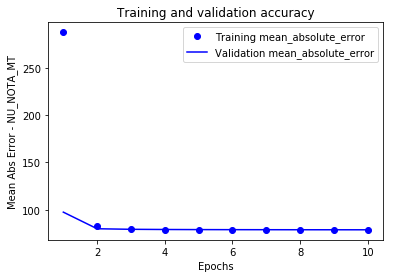

In [168]:
history = model.fit_generator(part_reader_f(partial_train),
                              steps_per_epoch=len(partial_train),
                              epochs=10,
                              validation_data=part_reader_f(validation),
                              validation_steps=len(validation))

show_accuracy_chart(history, 'NU_NOTA_MT')

In [172]:
score = model.evaluate_generator(part_reader_f(test_parts), steps=len(test_parts))
score

[60527.95115234375,
 12101.57064453125,
 12059.259354248046,
 12068.158454589844,
 12122.024288330078,
 12176.93841796875,
 78.72753533363343,
 78.7620007610321,
 78.5908337688446,
 78.74074798583985,
 78.91764259338379]

In [177]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
g = part_reader_f(partial_train)
for i in partial_train:
    x,y = next(g)
    reg.fit(x,y[:][0])

/home/tiago/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [182]:
g = part_reader_f(test_parts)
abs_err_arr = np.array([])
for i in partial_train:
    x,y = next(g)
    y_predicted = reg.predict(x)
    abs_err_arr = np.append(abs_err_arr, np.abs(reg.predict(x) - y[:][0]))
abs_err_arr.mean()

83.14182094647575